In [1]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

#route_data_script = joinpath("..", "src", "travel_times.jl")
#include(route_data_script);

data_json = joinpath("..", "..", "RC-2021-master", "data", "model_score_inputs", "new_actual_sequences.json");
actual_sequences_data = read_json(data_json)

Dict{String, Any} with 13 entries:
  "RouteID_bcc07fea-86d2-4… => Dict{String, Any}("actual"=>Dict{String, Any}("J…
  "RouteID_5486294a-503f-4… => Dict{String, Any}("actual"=>Dict{String, Any}("N…
  "RouteID_9475872b-287f-4… => Dict{String, Any}("actual"=>Dict{String, Any}("O…
  "RouteID_3f166f0e-fd2e-4… => Dict{String, Any}("actual"=>Dict{String, Any}("O…
  "RouteID_e6687a05-2453-4… => Dict{String, Any}("actual"=>Dict{String, Any}("D…
  "RouteID_7f5d87f0-c39f-4… => Dict{String, Any}("actual"=>Dict{String, Any}("L…
  "RouteID_15baae2d-bf07-4… => Dict{String, Any}("actual"=>Dict{String, Any}("B…
  "RouteID_2b8df66d-fcd4-4… => Dict{String, Any}("actual"=>Dict{String, Any}("W…
  "RouteID_693060a6-88bb-4… => Dict{String, Any}("actual"=>Dict{String, Any}("E…
  "RouteID_a8f0009d-e50a-4… => Dict{String, Any}("actual"=>Dict{String, Any}("P…
  "RouteID_d1a8c3dd-fa67-4… => Dict{String, Any}("actual"=>Dict{String, Any}("K…
  "RouteID_f3261fad-5f97-4… => Dict{String, Any}("actual"=>Dict{String, An

In [2]:
function parse_actual_sequences_data(data)
    m = length(data)
    sequences = Vector{Sequence{BareStop}}(undef, m)

    i = 1
    for (R, D) in data
        
        route_hash = R[9:end] # ignore RouteID
        actual_sequence = Vector{BareStop}(undef, length(D["actual"]))
        
        for (SeqId, SeqData) in D["actual"]
            #println(typeof(actual_sequence[SeqData+1]))
            #println(SeqData)
            actual_sequence[SeqData+1] = BareStop(SeqId)
        end
        
        sequences[i] = Sequence(route_hash, actual_sequence)
        i += 1
    end
    
    return sequences
end

parse_actual_sequences_data (generic function with 1 method)

In [7]:
@time data_seq = parse_actual_sequences_data(actual_sequences_data);

  0.001674 seconds (10.86 k allocations: 316.484 KiB)


In [8]:
data_seq[1].stops[1].id

"LO"

In [9]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

route_data_script = joinpath("..", "src", "route_data.jl")
include(route_data_script);

data_json = joinpath("..", "data", "model_apply_inputs", "new_route_data.json");
route_data = read_json(data_json)

@time data_route = parse_route_data(route_data);

  1.492714 seconds (1.92 M allocations: 112.415 MiB, 16.45% gc time, 99.58% compilation time)


In [26]:
findall(x->x.id=="LO", data_seq[1].stops)

1-element Vector{Int64}:
 1

In [23]:
data_route[2].hex_hash

"5486294a-503f-4346-b8a9-862e988cbe7c"

In [57]:
data_seq[13].hex_id

"fffd257c-3041-4736-be7a-5efea8af1173"

In [10]:
function get_route_order_for_google(route_num)
    
    coord_order_str = ""
    seq = data_seq[route_num]
    route = data_route[route_num]
    
    for S_seq in seq.stops
        
        for S_route in route.stops
            
            if(S_route.id == S_seq.id)
                #coord_order_str = coord_order_str*string(S_route.lng)*","*string(S_route.lat)
                println(string(S_route.lng)*","*string(S_route.lat)*",2357")
                break
            end
            
        end
        
    end
    
end

get_route_order_for_google (generic function with 1 method)

In [58]:
get_route_order_for_google(13)

-87.985697,42.254346,2357
-88.344131,42.195098,2357
-88.343928,42.19441,2357
-88.34287,42.193048,2357
-88.341865,42.191658,2357
-88.342168,42.191888,2357
-88.341766,42.193136,2357
-88.34055,42.191895,2357
-88.338501,42.19138,2357
-88.340312,42.192805,2357
-88.339558,42.193768,2357
-88.339219,42.194505,2357
-88.340411,42.194548,2357
-88.340059,42.195062,2357
-88.34187,42.196792,2357
-88.34237,42.1953,2357
-88.342555,42.195943,2357
-88.34409,42.196762,2357
-88.34406,42.197656,2357
-88.342747,42.197639,2357
-88.341921,42.197945,2357
-88.3435,42.198556,2357
-88.343132,42.199479,2357
-88.345383,42.199449,2357
-88.345404,42.198061,2357
-88.345482,42.196904,2357
-88.345332,42.196396,2357
-88.346187,42.197682,2357
-88.346697,42.197686,2357
-88.348025,42.198623,2357
-88.347187,42.199451,2357
-88.348038,42.199467,2357
-88.348783,42.201245,2357
-88.348002,42.202799,2357
-88.347222,42.202068,2357
-88.346826,42.200136,2357
-88.350514,42.19889,2357
-88.353292,42.197716,2357
-88.352168,42.198788,2357

In [20]:
get_route_order_for_google(2)

-117.653303,33.965477,2357
-117.862424,33.868723,2357
-117.867676,33.868871,2357
-117.863537,33.866936,2357
-117.86438,33.86678,2357
-117.864206,33.865725,2357
-117.860363,33.866049,2357
-117.861312,33.866481,2357
-117.861384,33.865802,2357
-117.862207,33.866585,2357
-117.860631,33.86756,2357
-117.859769,33.867563,2357
-117.859701,33.867112,2357
-117.858267,33.866569,2357
-117.858045,33.867617,2357
-117.857103,33.867139,2357
-117.857189,33.86769,2357
-117.856326,33.86763,2357
-117.854655,33.867461,2357
-117.861226,33.865323,2357
-117.860152,33.849694,2357
-117.85152,33.860181,2357
-117.840796,33.855232,2357
-117.828912,33.866872,2357
-117.830057,33.866992,2357
-117.831298,33.866904,2357
-117.828956,33.864946,2357
-117.826631,33.866039,2357
-117.826429,33.868303,2357
-117.826431,33.868788,2357
-117.823462,33.867914,2357
-117.822724,33.867844,2357
-117.822742,33.868402,2357
-117.821807,33.867873,2357
-117.820904,33.868044,2357
-117.81942,33.868259,2357
-117.819916,33.869067,2357
-117.820

In [21]:
get_route_order_for_google(7)

-87.985697,42.254346,2357
-88.0217,42.109579,2357
-88.020213,42.107027,2357
-88.022233,42.10701,2357
-88.022737,42.108395,2357
-88.024165,42.109334,2357
-88.02416,42.111391,2357
-88.025802,42.112436,2357
-88.025814,42.107906,2357
-88.025808,42.107336,2357
-88.025797,42.105925,2357
-88.025792,42.105136,2357
-88.027433,42.106359,2357
-88.027437,42.107244,2357
-88.027437,42.109572,2357
-88.029854,42.110255,2357
-88.02907,42.108913,2357
-88.029074,42.107767,2357
-88.030702,42.108287,2357
-88.030698,42.108819,2357
-88.032333,42.109444,2357
-88.032343,42.107973,2357
-88.032347,42.107161,2357
-88.035197,42.109062,2357
-88.035445,42.107882,2357
-88.037391,42.108656,2357
-88.03641,42.10896,2357
-88.03641,42.109819,2357
-88.037638,42.110313,2357
-88.038667,42.110246,2357
-88.038294,42.109283,2357
-88.039213,42.110331,2357
-88.04133,42.11103,2357
-88.04132,42.111796,2357
-88.040606,42.111254,2357
-88.03888,42.112258,2357
-88.039517,42.113068,2357
-88.04024,42.113072,2357
-88.04132,42.113161,2357


In [ ]:
seq = data_seq[route_num]
route = data_route[route_num]

for S_seq in seq.stops

    for S_route in route.stops

        if(S_route.id == S_seq.id)
            println(string(S_route.lng)*","*string(S_route.lat)*",2357")
            break
        end

end

In [37]:
function get_csv_route_sequence_for_google(route_num)
    seq = data_seq[route_num]
    route = data_route[route_num]
    println(route.hex_hash)
    println("STOP,ZONE,LAT,LONG,ORDER")
    for S_route in route.stops
        stop_str = string(S_route.id)*","*string(S_route.zone_id.high)*string(S_route.zone_id.subzone)*","*string(S_route.lat)*","*string(S_route.lng)*","*string(findall(x->x.id==S_route.id, data_seq[route_num].stops)[1])
        println(stop_str)
    end
end

get_csv_route_sequence_for_google (generic function with 1 method)

In [70]:
get_csv_route_sequence_for_google(13)

fffd257c-3041-4736-be7a-5efea8af1173
STOP,ZONE,LAT,LONG,ORDER
WB,B29.3B,42.1953,-88.34237,16
DP,B29.2E,42.198879,-88.378252,88
EW,B29.2D,42.198169,-88.365029,67
DO,B29.1G,42.196592,-88.386793,110
SR,B29.1B,42.201245,-88.348783,33
TA,B29.3G,42.200512,-88.382751,97
YQ,B29.2E,42.203963,-88.37661,82
YW,B29.3A,42.191658,-88.341865,5
NP,B29.3C,42.200899,-88.35858,55
RN,B28.3J,42.202113,-88.391407,164
RJ,B28.3J,42.203004,-88.390313,165
SJ,B29.2E,42.200591,-88.37826,87
UO,B29.3G,42.196058,-88.382943,102
US,B28.2J,42.202461,-88.404721,157
XX,B29.1C,42.201933,-88.351777,40
AE,B29.1B,42.196904,-88.345482,26
FR,B29.3E,42.200061,-88.381791,96
UE,B29.3E,42.199803,-88.381103,95
DA,B29.3G,42.198163,-88.38282,101
MQ,B29.3H,42.207295,-88.398338,133
VG,B29.1H,42.19618,-88.389249,125
EF,0,42.199528,-88.370133,73
NF,B29.1B,42.196396,-88.345332,27
FQ,B29.3E,42.200606,-88.38012,92
OF,B29.3B,42.194548,-88.340411,13
GZ,B29.3E,42.199971,-88.379364,91
KO,B29.3A,42.191888,-88.342168,6
IY,B29.1B,42.197686,-88.3466

# Model BUILD

In [71]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

#route_data_script = joinpath("..", "src", "travel_times.jl")
#include(route_data_script);

data_json = joinpath("..", "..", "RC-2021-master", "data", "model_build_inputs", "actual_sequences.json");
actual_sequences_data_build = read_json(data_json)
@time data_seq_build = parse_actual_sequences_data(actual_sequences_data_build);

  0.923760 seconds (4.78 M allocations: 138.678 MiB, 41.61% gc time, 6.16% compilation time)


In [72]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

route_data_script = joinpath("..", "src", "route_data.jl")
include(route_data_script);

data_json = joinpath("..", "..", "RC-2021-master", "data", "model_build_inputs", "route_data.json");
route_data_build = read_json(data_json)

@time data_route_build = parse_route_data(route_data_build);

  3.039054 seconds (6.97 M allocations: 292.098 MiB, 36.15% gc time, 4.01% compilation time)


In [73]:
function get_route_order_for_google_build(route_num)
    
    coord_order_str = ""
    seq = data_seq_build[route_num]
    route = data_route_build[route_num]
    
    for S_seq in seq.stops
        
        for S_route in route.stops
            
            if(S_route.id == S_seq.id)
                #coord_order_str = coord_order_str*string(S_route.lng)*","*string(S_route.lat)
                println(string(S_route.lng)*","*string(S_route.lat)*",2357")
                break
            end
            
        end
        
    end
    
end

get_route_order_for_google_build (generic function with 1 method)

In [82]:
get_route_order_for_google_build(3326)

-71.494346,42.139891,2357
-71.69031,42.324441,2357
-71.689018,42.324178,2357
-71.690055,42.325454,2357
-71.692719,42.325465,2357
-71.692063,42.322974,2357
-71.691936,42.322716,2357
-71.690644,42.322382,2357
-71.691179,42.321753,2357
-71.691314,42.321329,2357
-71.691484,42.320819,2357
-71.691652,42.32029,2357
-71.690267,42.31824,2357
-71.689659,42.317692,2357
-71.686694,42.313471,2357
-71.688356,42.314638,2357
-71.690376,42.314841,2357
-71.690801,42.315131,2357
-71.69233,42.314267,2357
-71.693849,42.315422,2357
-71.691407,42.315926,2357
-71.693014,42.318168,2357
-71.697876,42.313773,2357
-71.697509,42.31271,2357
-71.698341,42.312423,2357
-71.6961,42.312318,2357
-71.694176,42.312877,2357
-71.691075,42.31233,2357
-71.691401,42.311926,2357
-71.691094,42.311186,2357
-71.69519,42.31159,2357
-71.696866,42.310832,2357
-71.696694,42.30849,2357
-71.690925,42.307876,2357
-71.693701,42.308759,2357
-71.697786,42.310703,2357
-71.699648,42.310921,2357
-71.698007,42.310537,2357
-71.698828,42.30942,235

In [75]:
data_route_build[1].hex_hash

"c0538d99-05d1-436b-b0aa-efe26603d606"

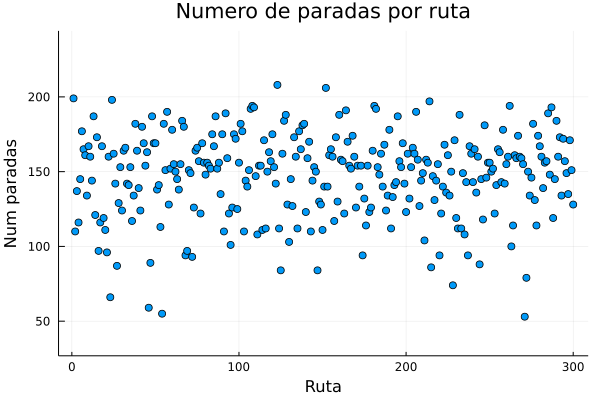

In [76]:
using Plots

num_paradas = [length(R.stops) for R in data_route_build]

# xticks=[("$i", i) for i in 1:13], 
plot(1:300, [length(R.stops) for R in data_route_build], seriestype=:scatter, xlab="Ruta", ylab="Num paradas", lab="", title="Numero de paradas por ruta")

In [77]:
maximum(num_paradas)

238

In [80]:
posMaximo = findall(x->length(x.stops)==238, data_route_build)

1-element Vector{Int64}:
 3326

In [79]:
length(data_route_build[3326].stops)

238

In [81]:
data_route_build[3326].hex_hash

"bb009f83-c785-4a87-9bad-5caa4cc69921"

In [83]:
length(data_route_build)

6112

In [84]:
station_count = 0
for R in data_route_build
    for S in R.stops
        if(is_station(S))
            station_count += 1
        end
    end
end

println(station_count)

6112


# Generación Automática de KML

In [99]:
function get_kml_content_from_route(route_num, is_build=false)
    initial_str = "<?xml version='1.0' encoding=\"UTF-8\"?><kml xmlns=\"http://www.opengis.net/kml/2.2\"><Document><name>"
    kml_color_score = "5014f0e6" # Yellow by Default (Medium Score)
    if(is_build)
        initial_str= initial_str*"Rutas RCL Build</name><description>RouteID_"*data_route_build[route_num].hex_hash*"</description><Style id=\"colorLineColorPoly\"><LineStyle><color>"
        if(data_route_build[route_num].score==1)
            kml_color_score="501400e6" # Red (Low Score)
        end
        if(data_route_build[route_num].score==3)
            kml_color_score="5000aa14" # Green (High Score)
        end
    else
        initial_str= initial_str*"Rutas RCL Apply</name><description>RouteID_"*data_route[route_num].hex_hash*"</description><Style id=\"colorLineColorPoly\"><LineStyle><color>"
        kml_color_score = "50b41e14" # Blue (Model Apply)
    end
    initial_str = initial_str*"</color><width>4</width></LineStyle><PolyStyle><color>"*kml_color_score*"</color></PolyStyle></Style> <Placemark><name>Relieve absoluto</name><description></description><styleUrl>#colorLineColorPoly</styleUrl><LineString><extrude>1</extrude><tessellate>1</tessellate><altitudeMode>absoluto</altitudeMode><coordinates>"
    println(initial_str)
    if(is_build)
        get_route_order_for_google_build(route_num)
    else
        get_route_order_for_google(route_num)
    end
    final_str = "</coordinates></LineString></Placemark></Document></kml>"
    println(final_str)
end

get_kml_content_from_route (generic function with 2 methods)

In [100]:
get_kml_content_from_route(1)  # Content must be copied to .kml file

<?xml version='1.0' encoding="UTF-8"?><kml xmlns="http://www.opengis.net/kml/2.2"><Document><name>Rutas RCL Apply</name><description>RouteID_bcc07fea-86d2-41e4-9a58-cfc78956dcc7</description><Style id="colorLineColorPoly"><LineStyle><color></color><width>4</width></LineStyle><PolyStyle><color>50b41e14</color></PolyStyle></Style> <Placemark><name>Relieve absoluto</name><description></description><styleUrl>#colorLineColorPoly</styleUrl><LineString><extrude>1</extrude><tessellate>1</tessellate><altitudeMode>absoluto</altitudeMode><coordinates>
-117.653303,33.965477,2357
-117.686367,34.099186,2357
-117.686236,34.099586,2357
-117.685507,34.098667,2357
-117.684777,34.099595,2357
-117.682446,34.0996,2357
-117.68234,34.09898,2357
-117.679912,34.105032,2357
-117.68244,34.103223,2357
-117.684919,34.103207,2357
-117.686544,34.103199,2357
-117.687632,34.103193,2357
-117.690332,34.103178,2357
-117.690582,34.10836,2357
-117.690339,34.109366,2357
-117.691977,34.10671,2357
-117.683236,34.106862,2357
-

In [101]:
get_kml_content_from_route(1, true)  # Content must be copied to .kml file

<?xml version='1.0' encoding="UTF-8"?><kml xmlns="http://www.opengis.net/kml/2.2"><Document><name>Rutas RCL Build</name><description>RouteID_c0538d99-05d1-436b-b0aa-efe26603d606</description><Style id="colorLineColorPoly"><LineStyle><color></color><width>4</width></LineStyle><PolyStyle><color>5000aa14</color></PolyStyle></Style> <Placemark><name>Relieve absoluto</name><description></description><styleUrl>#colorLineColorPoly</styleUrl><LineString><extrude>1</extrude><tessellate>1</tessellate><altitudeMode>absoluto</altitudeMode><coordinates>
-88.097259,41.803295,2357
-88.410844,41.862332,2357
-88.393302,41.863946,2357
-88.392475,41.863934,2357
-88.390444,41.864229,2357
-88.385909,41.864101,2357
-88.38537,41.864096,2357
-88.384636,41.863264,2357
-88.387149,41.863269,2357
-88.387531,41.863348,2357
-88.385947,41.866337,2357
-88.38819,41.866287,2357
-88.38932,41.866237,2357
-88.390844,41.866868,2357
-88.391272,41.866874,2357
-88.392731,41.866886,2357
-88.391558,41.86875,2357
-88.39096,41.86

# Generación Automática de CSV

In [123]:
function get_csv_content_from_route(route_num, is_build=false)
    if(is_build)
        seq = data_seq_build[route_num]
        route = data_route_build[route_num]
    else
        seq = data_seq[route_num]
        route = data_route[route_num]
    end
    #println(route.hex_hash)
    println("STOP,ZONE,LAT,LONG,ORDER")
    for S_route in route.stops
        stop_str = string(S_route.id)*","*string(S_route.zone_id.high)*string(S_route.zone_id.subzone)*","*string(S_route.lat)*","*string(S_route.lng)*","*string(findall(x->x.id==S_route.id, seq.stops)[1])
        println(stop_str)
    end
end

get_csv_content_from_route (generic function with 2 methods)

In [124]:
get_csv_content_from_route(1) # Content must be copied to .csv file

STOP,ZONE,LAT,LONG,ORDER
JA,H24.1A,34.109231,-117.670708,30
LX,H24.1B,34.103199,-117.686544,11
YC,H24.2C,34.099595,-117.684777,5
CC,H23.1A,34.117094,-117.67559,52
SA,H23.2C,34.115674,-117.652853,92
OP,H24.1A,34.11056,-117.679606,43
UQ,H23.3C,34.112306,-117.655622,103
BB,H23.1D,34.111087,-117.642348,131
JB,H24.1A,34.109415,-117.678194,35
VQ,H24.1A,34.109667,-117.672349,41
PP,H23.1E,34.103642,-117.636831,139
VU,H23.3D,34.112741,-117.647419,114
VL,H23.1A,34.116481,-117.67717,50
SF,H23.3D,34.111752,-117.649752,111
ZT,H24.2C,34.099586,-117.686236,3
EW,H23.1C,34.11744,-117.657937,85
DW,H23.3B,34.108707,-117.663908,68
TF,H23.3D,34.110444,-117.647406,112
WD,H23.1E,34.103935,-117.638666,140
OA,H23.3B,34.108694,-117.665981,69
TR,H24.1C,34.103223,-117.68244,9
TE,H24.2A,34.108484,-117.670231,29
OL,H23.3C,34.10982,-117.652644,108
GB,H23.2D,34.111023,-117.645121,120
DU,H23.3A,34.110131,-117.669827,64
RM,H24.3B,34.107131,-117.672965,27
GT,H23.2A,34.11345,-117.67348,57
GA,H24.1B,34.103178,-117.690332,

In [125]:
get_csv_content_from_route(1, true) # Content must be copied to .csv file

STOP,ZONE,LAT,LONG,ORDER
BC,D6.2D,41.896911,-88.351055,118
WB,D6.2E,41.879159,-88.370817,94
BV,D6.1C,41.884344,-88.334379,174
OP,D6.2H,41.875351,-88.390648,28
DP,D6.1D,41.891701,-88.356287,110
OM,D6.2G,41.879027,-88.38632,58
TE,D6.2H,41.872362,-88.390551,23
NY,D6.2C,41.88725,-88.351245,154
SR,D6.2E,41.875923,-88.369276,85
HM,D6.2C,41.884828,-88.35277,159
RJ,D6.1E,41.889394,-88.355944,102
UO,D6.3A,41.895709,-88.342902,129
EE,D6.1G,41.877198,-88.397176,46
UD,D6.3B,41.889948,-88.337695,197
US,D6.3D,41.894091,-88.347327,122
CM,D6.3J,41.863946,-88.393302,3
OJ,D6.3J,41.864229,-88.390444,5
AE,D6.1B,41.888289,-88.331502,186
UF,D6.2A,41.893718,-88.33125,138
MJ,D6.1D,41.89459,-88.357981,108
FI,D6.1G,41.876343,-88.399008,44
DA,D6.2G,41.878839,-88.385031,59
PI,D6.3E,41.874997,-88.370177,80
GW,D6.3H,41.866886,-88.392731,16
NF,D6.3E,41.88257,-88.377681,78
TV,D6.1H,41.874555,-88.396501,36
PD,D6.3G,41.873834,-88.378382,65
YD,D6.3C,41.887052,-88.350144,153
AD,D6.3C,41.892976,-88.347082,143
XI,D6.3E,41.